This notebook is meant for the students of Basics of Applied Mathematics, in the master of Mathematics in Data and Technology, Freiburg Univsersity, 2024

# Programming Exercise for Homework 12

# Hand in: 21.01.2025

## Your task

This notebook containa some code snippets with missing lines that you will have to fill in! Please also try to read and understand the parts that you do not have to fill in to understand better how the code works.

# A guided exercise about the logistic regression.

In [1]:
import numpy as np # Package for array manipulations
import matplotlib.pyplot as plt # Package for plotting


# Jupyter magic command to make the plots a bit nicer
%matplotlib notebook 
                     # replace with "%matplotlib inline" 
                     # in case one uses the VS code UI
                     # instead of the Jupyter UI

## Description 

In this exercise, some data on the form $(a_1, y_1), \dots, (a_m, y_m)$ is available, where $a_j \in \mathbb{R}^2$ are the labels and $y_j \in \{0, 1\}$ are the labels.

The goal is apply logistic regression to the data to learn a classifier $\varphi(a_j)$ that can predict the class of $y_j$.

## Create the data set

In [2]:
dataset = [
    (np.array([ 10,  1]), 0),
    (np.array([  9, -1]), 0),
    (np.array([  8, -3]), 0),
    (np.array([ 13, -6]), 0),
    (np.array([ 18,-10]), 0),
    (np.array([  0, 10]), 0),
    (np.array([  0,  8]), 0),
    (np.array([  1,  5]), 0),
    (np.array([ 15, -5]), 0),
    (np.array([  8,  0]), 0),
    (np.array([ 11,  0]), 0),
    (np.array([  0, -5]), 0),
    (np.array([ 15,  8]), 0),
    (np.array([ 10,  5]), 0),
    (np.array([ 13, -3]), 0),
    (np.array([ -5, 10]), 0),
    (np.array([ -1, -7]), 1),
    (np.array([  3, -5]), 1),
    (np.array([ 10,-15]), 1),
    (np.array([-10,  3]), 1),
    (np.array([ -2,  3]), 1),
    (np.array([ -5,  2]), 1),
    (np.array([  5,-12]), 1),
    (np.array([  0, -8]), 1),
    (np.array([ -3, -3]), 1),
    (np.array([  5,  3]), 1),
    (np.array([ 15,-10]), 1),
    (np.array([  4,-10]), 1),
    (np.array([  5, -9]), 1),
    (np.array([  8, -8]), 1),
    (np.array([ 11,-13]), 1),
    (np.array([ 15,-18]), 1),
    (np.array([ -5,  0]), 1),
    (np.array([ -3,  0]), 1),
    (np.array([  0, -1]), 1),
    (np.array([ 10,-15]), 1),
    (np.array([  5, -8]), 1),
    (np.array([  5,-11]), 1),
    
]

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Create the vector $y \in \mathbb{R}^m$, containing all $y_j$ and the matrix $A \in \mathbb{R}^{m \times 2}$ containing all $a_j$ 
</div>

In [3]:
# ----- YOUR CODE
m = len(dataset)
A = np.empty((m, 2))
y = np.empty(m)
for j, (aj, yj) in enumerate(dataset):
    A[j,:] = aj
    y[j] = yj
# --------- END YOUR CODE

## Visualization of the data

<IPython.core.display.Javascript object>


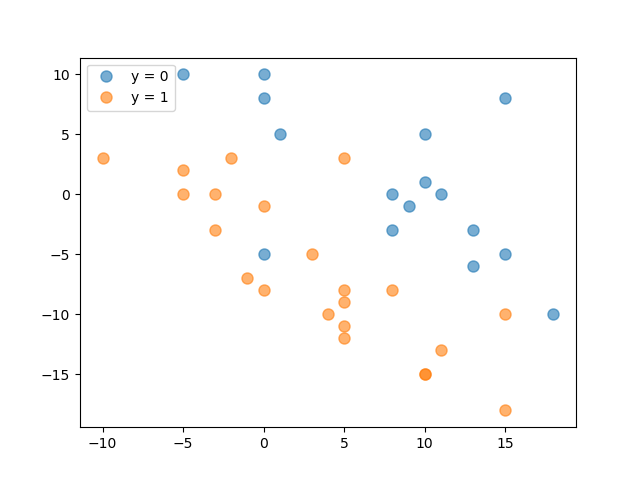

In [4]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, ax = plt.subplots()
ax.plot(A[y==0, 0], A[y==0, 1], "o", label=r"y = 0", color=colors[0], alpha=0.6, markersize=8)
ax.plot(A[y==1, 0], A[y==1, 1], "o", label=r"y = 1", color=colors[1], alpha=0.6, markersize=8)
ax.legend()

## Define a predictor

Now we are going to define the function $\phi(a_j; x)$ as follows:
$$
\phi(a_j; x) =
\frac{1}{1 + e^{a_j^\top x}}
\begin{bmatrix}
    1 \\ e^{a_j^\top x}
\end{bmatrix}
$$

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Create the vector $y \in \mathbb{R}^m$, containing all $y_j$ and the matrix $A \in \mathbb{R}^{m \times 2}$ containing all $a_j$ 
</div>

In [5]:
def Phi(a, x):

    # ----- YOUR CODE
    exp = np.exp(np.inner(a, x))
    phi1 = 1 / (1+exp)
    phi2 = exp / (1+exp)
    phi = np.array([phi1, phi2])
    # --------- END YOUR CODE

    return phi

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Compute the vector of predicted classes for $x=[5,7]$.
Note that the predicted class here does not refer to the value of $\phi$ but to the class corresponding to the biggest component of $\phi$
</div>

In [6]:
x_test = np.array([5, 7])
y_test = np.empty(m)
# ----- YOUR CODE
for j in range(m):
    phi_test = Phi(A[j], x_test)
    y_test[j] = np.argmax(phi_test)
# --------- END YOUR CODE

<IPython.core.display.Javascript object>


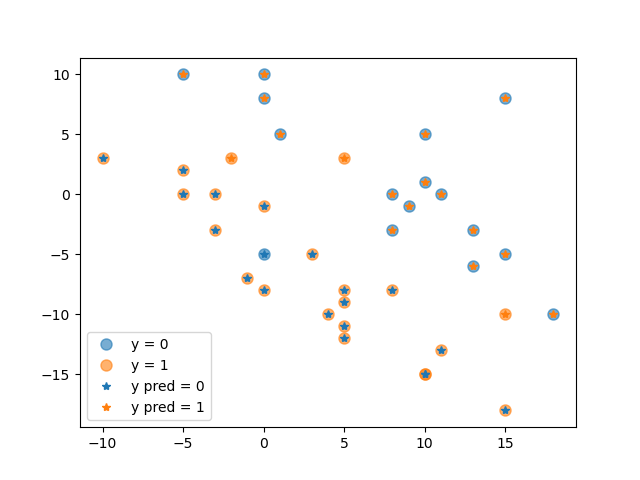

In [7]:
# Make a visualization of it.
fig, ax = plt.subplots()
ax.plot(A[y==0, 0], A[y==0, 1], "o", label=r"y = 0", color=colors[0], alpha=0.6, markersize=8)
ax.plot(A[y==1, 0], A[y==1, 1], "o", label=r"y = 1", color=colors[1], alpha=0.6, markersize=8)
ax.plot(A[y_test==0, 0], A[y_test==0, 1], "*", label=r"y pred = 0", color=colors[0])
ax.plot(A[y_test==1, 0], A[y_test==1, 1], "*", label=r"y pred = 1", color=colors[1])
ax.legend()


## Construct the loss function

In Logistic regression, the objective that is to be minimized is the following function:
$$
    L(x) = \sum_{j=1}^m l \bigg(p_j, \phi(a_j; x) \bigg)
$$

where $l(p_j, q_j) :=  -\sum_{j=1}^m p_j \log(q_j)$ is the cross entropy,

and $p_j = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ when $y_j = 0$ and  $p_j = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ when $y_j = 1$


<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the function Make_probability(yj) that takes a label $y_j \in \{0, 1 \}$ and outputs $p_j$
</div>

In [8]:
def Make_probability(yj):
    pj = np.zeros(2)
    yj = int(yj)
    # ----- YOUR CODE
    pj[yj] = 1
    # --------- END YOUR CODE
    return pj

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the function Cross_Entropy(p,q) which computes the cross entropy between two probability densities $l(p, q)$
</div>

In [9]:
def Cross_Entropy(p, q):
    # ----- YOUR CODE
    l = - np.inner(p, np.log(q))
    # --------- END YOUR CODE
    return l

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Use the previously defined functions to complete the function Logistic_cost(x) which computes the logistic cost $L(x)$
</div>

In [10]:
def logistic_cost(x):
    cost = 0
    for j in range(m):
        # ----- YOUR CODE
        pj = Make_probability(y[j])
        qj = Phi(A[j], x)
        cost_j = Cross_Entropy(pj, qj)
        # --------- END YOUR CODE
        cost = cost + cost_j
    return cost

## Compute the cost on a grid

In order to visualize the cost function, we are going to compute it for a grid of points in the square $[-10, 10] \times [-10, 10]$

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to evaluate the cost function for each point of the grid
</div>

In [11]:
n_grid = 200
x1_grid = np.linspace(-10., 10., num=n_grid)
x2_grid = np.linspace(-10., 10., num=n_grid)
costs = np.empty((n_grid, n_grid))
for (i1, x1) in enumerate(x1_grid):
    for (i2, x2) in enumerate(x2_grid):
        # ----- YOUR CODE
        x = np.array([x1, x2])
        costs[i1, i2] = logistic_cost(x)
        # --------- END YOUR CODE

<IPython.core.display.Javascript object>


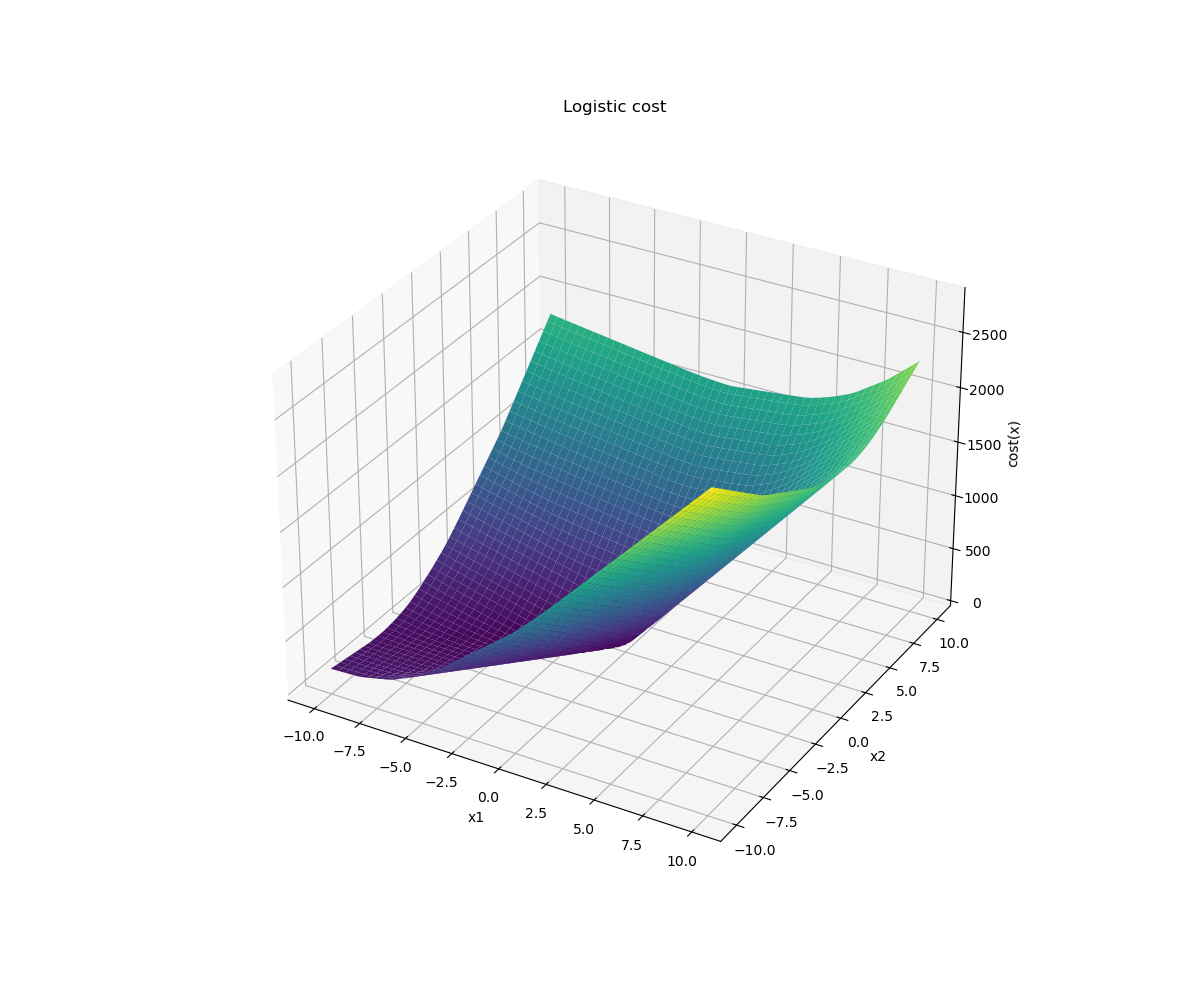

In [12]:
# Visualization of the cost function.

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# Labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('cost(x)')
ax.set_title('Logistic cost')

X1, X2 = np.meshgrid(x1_grid, x2_grid)
ax.plot_surface(X1, X2, costs, cmap='viridis')
plt.show()

## Use an optimization solver

In this part, we show how to use an optimization solver called IPOPT, interfaced with CasADi to solver the optimization problem.

Because this is not compatible with numpy operations, we need to redefine everything from scratch.

There is not going to be any task from you in this last part

In [13]:
import casadi as ca

In [14]:
# Create the predictor function
a = ca.SX.sym("aj", 2)
x =  ca.SX.sym("x", 2)
exp = ca.exp(a.T @ x)
phi1 = 1 / (1 + exp)
phi2 = exp / (1+exp)
phi = ca.vertcat(phi1, phi2)
phi_fn = ca.Function("Phi", [a, x], [phi])

# Define the cross entropy, adapted for the package CasADi
def cross_entropy_casadi(pj, qj):
    return -  ca.log(qj).T @ pj

# Compute the symbolic value of the cost (as a function of the symbolic variable x)
cost = 0
for j in range(m):
    pj = Make_probability(y[j])
    qj = phi_fn(A[j], x)
    cost_j = cross_entropy_casadi(pj, qj)
    cost = cost + cost_j

In [15]:
# Call the general solver IPOPT to minimize the cost as a function of x
nlp = {"x":x, "f":cost}
solver = ca.nlpsol("solver", "ipopt", nlp)
solution = solver()
x_star = solution["x"].full().squeeze()
value = solution["f"].full()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

## Visualize the function with the minimum that we have found.

<IPython.core.display.Javascript object>


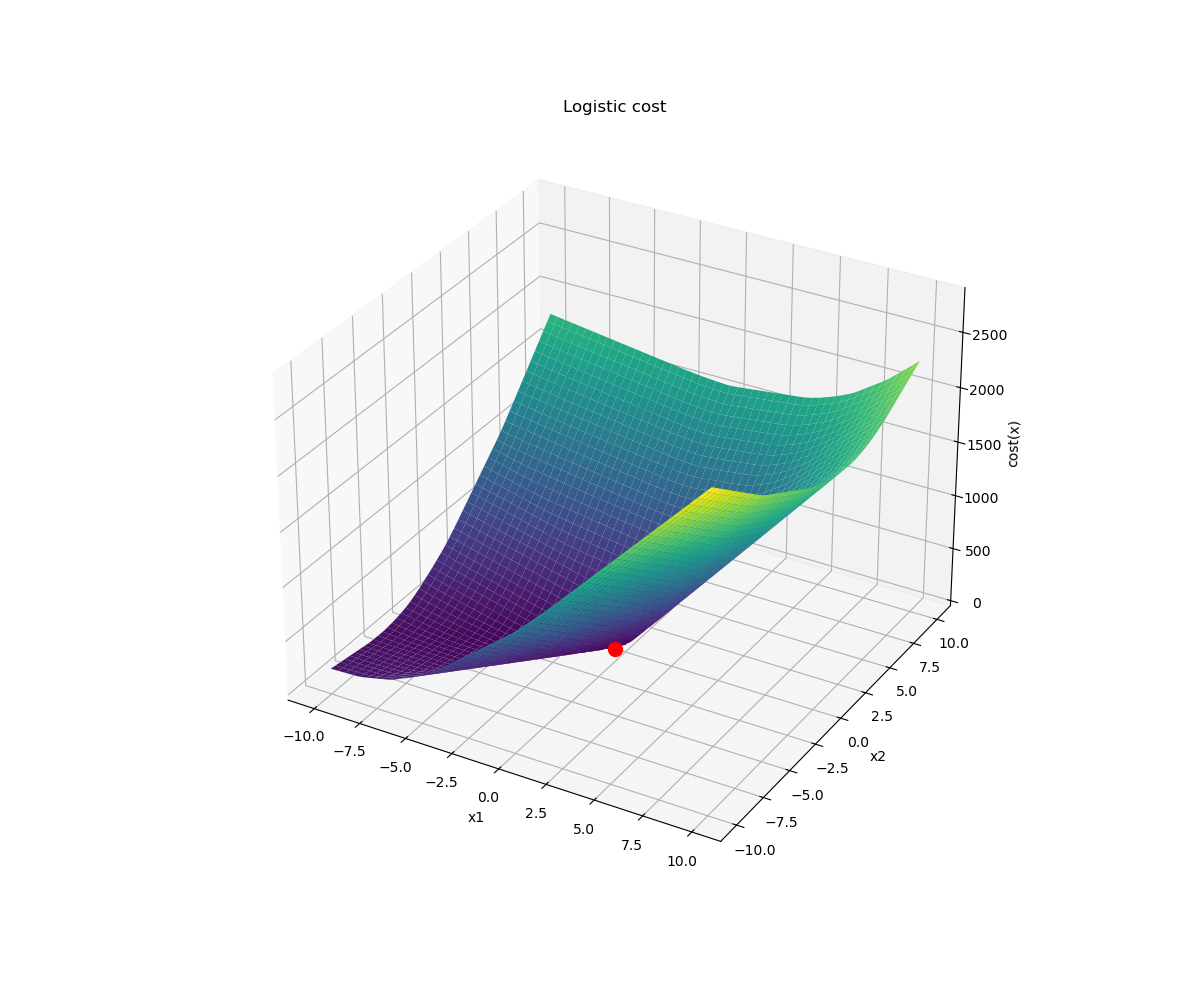

In [16]:
# Visualization of the cost function.

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# Labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('cost(x)')
ax.set_title('Logistic cost')

X1, X2 = np.meshgrid(x1_grid, x2_grid)
ax.plot_surface(X1, X2, costs, cmap='viridis')
ax.plot(x_star[0], x_star[1], value, "o", color="red", markersize=10)

plt.show()

## Use the solution to classify

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to evaluate the model to make predictions on the labels y
</div>

In [17]:
y_pred = np.empty(m)
for j in range(m):
    # ----- YOUR CODE
    phi_pred = Phi(A[j], x_star)
    y_pred[j] = np.argmax(phi_pred)
    # --------- END YOUR CODE

<IPython.core.display.Javascript object>


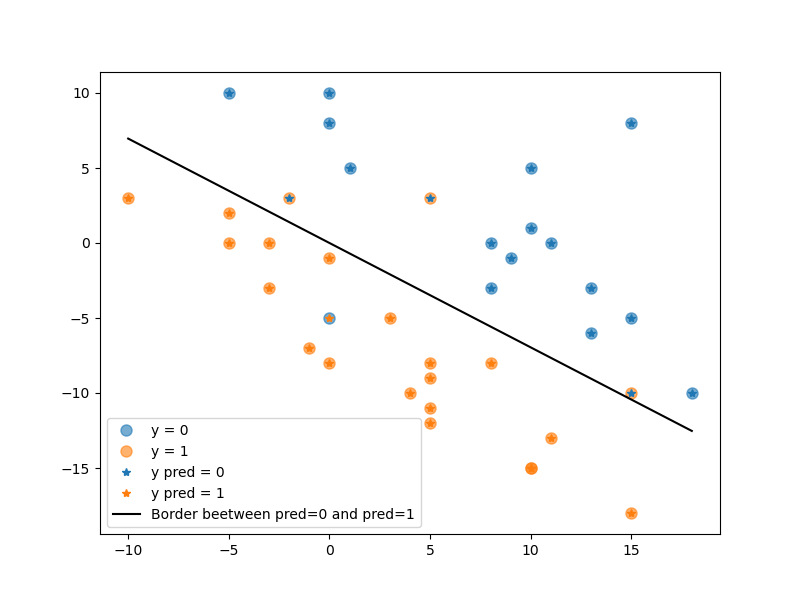

In [18]:
# Make a visualization of it.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(A[y==0, 0], A[y==0, 1], "o", label=r"y = 0", color=colors[0], alpha=0.6, markersize=8)
ax.plot(A[y==1, 0], A[y==1, 1], "o", label=r"y = 1", color=colors[1], alpha=0.6, markersize=8)
ax.plot(A[y_pred==0, 0], A[y_pred==0, 1], "*", label=r"y pred = 0", color=colors[0])
ax.plot(A[y_pred==1, 0], A[y_pred==1, 1], "*", label=r"y pred = 1", color=colors[1])

a1_min = A[:, 0].min()
a2_min = - a1_min * x_star[0] / x_star[1]
a1_max = A[:, 0].max()
a2_max = - a1_max *  x_star[0] / x_star[1]
ax.plot([a1_min, a1_max], [a2_min, a2_max], label="Border beetween pred=0 and pred=1", color="black")
ax.legend()